<a href="https://colab.research.google.com/github/pcsilcan/aed/blob/master/week12/12_Bellman_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Programming in Graphs

## Bellman-Ford

Algorithm for shortest path from single source

In [0]:
import math

def bellmanFord(G, s):
    n = len(G)
    dist = [math.inf]*n
    path = [None]*n

    dist[s] = 0

    for i in range(n-1):

        for u in range(n):
            for v, w in G[u]:
                f = dist[u] + w
                if f < dist[v]:
                    dist[v] = f
                    path[v] = u

    for u in range(n):
        for v, w in G[u]:
            if dist[v] > dist[u] + w:
                return False, _, _
    
    return True, path, dist
    

In [0]:
import graphviz as gv

def drawAdjListGraph(G):
    dot = gv.Digraph(strict=True)
    n = len(G)
    for u in range(n):
        for v, w in G[u]:
            dot.edge(str(u), str(v), label=str(w))
    
    dot.graph_attr['rankdir'] = 'LR'
    return dot

In [0]:
def loadAdjListGraph(filename):
    G = []
    with open(filename) as file:
        for line in file:
            if line == '*':
                G.append([])
            else:
                temp = line.strip().split(' ')
                temp = [p.split(',') for p in temp]
                temp = [(int(x), int(y)) for x, y in temp]
                G.append(temp)

    return G

In [21]:
%%writefile grafo.al
1,10 2,20
3,50 4,10
3,20 4,33
4,-20 5,-2
5,1
*

Overwriting grafo.al


[(1, 10), (2, 20)]
[(3, 50), (4, 10)]
[(3, 20), (4, 33)]
[(4, -20), (5, -2)]
[(5, 1)]
[]


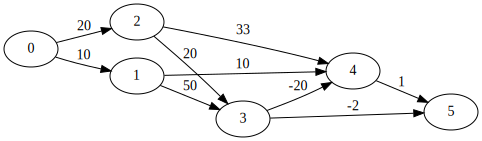

In [59]:
G = loadAdjListGraph('grafo.al')
for l in G:
    print(l)
drawAdjListGraph(G)

In [0]:
def draw(path, dist):
    dot = gv.Digraph(comment="G")
    n = len(path)
    for i in range(n):
        dot.node(str(i), str(i))
    for i in range(n):
        if path[i] != None:
            dot.edge(str(path[i]), str(i), label=str(dist[i]))
    dot.graph_attr['rankdir'] = 'LR'
    return dot

[None, 0, 0, 2, 1, 4]
[0, 10, 20, 40, 20, 21]


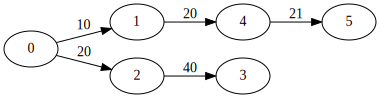

In [61]:
ok, path, dist = bellmanFord(G, 0)
print(path)
print(dist)
draw(path, dist)